In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler

## load iris data

In [2]:
iris = ds.load_iris()
X = iris.data
X = X[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

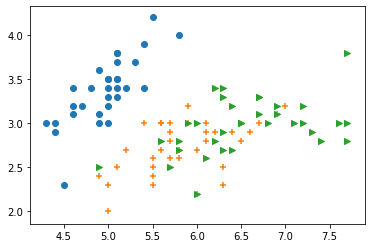

In [3]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], marker="o")
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], marker="+")
plt.scatter(X_train[y_train==2, 0], X_train[y_train==2, 1], marker=">")

## KNN Basic(sklearn)

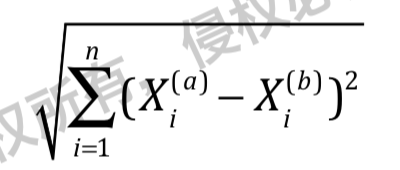

In [4]:
kneighbor = KNeighborsClassifier(n_neighbors=5)
kneighbor.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [5]:
kneighbor.score(X_test, y_test)

0.8

In [6]:
def mykNN_Practice01(X_train, y_train, X_test, k):
    y_predict = [knn_Practice(X_train, y_train, x_test, k) for x_test in X_test]
    return y_predict

#the size of X_test is equal 1
def knn_Practice(X_train, y_train, x_test, k):
    
    #get distances from X_train to x_test
    distances = [math.sqrt(np.sum((x_train - x_test) ** 2)) for x_train in X_train]
    
    #arg sort
    arg_dis = np.argsort(distances)
    
    #get top k from y_train
    topk_y = [y_train[arg] for arg in arg_dis[:k]]
    
    #get most common from topk
    y_test = Counter(topk_y).most_common(1)[0][0]
    return y_test

In [7]:
#the size of X_test is greater than 1
def mykNN_Practice02(X_train, y_train, X_test, k):

    distances = [[math.sqrt(np.sum((x_train - x_test) ** 2)) for x_train in X_train] for x_test in X_test]
    
    votes = np.argsort(distances)
    
    topV_y = [y_train[v[:k]] for v in votes]

    y_test = [Counter(top).most_common(1)[0][0] for top in topV_y]
    return y_test

## acurancy score

In [8]:
def score(y_predict, y_test):
    return np.sum(y_predict == y_test) / len(y_test)

In [9]:
y_predict01 = mykNN_Practice01(X_train, y_train, X_test, k=5)
score(y_predict01, y_test)

0.8

In [10]:
y_predict02 = mykNN_Practice02(X_train, y_train, X_test, k=5)
score(y_predict02, y_test)

0.8

## Implement my KNN algorithm

In [11]:
#method3
%run "../myMLStudy/MyKNNClassifier"

In [12]:
myKNN = MyKNNClassifier(k=5)
myKNN.fit(X_train, y_train)

MyKNNClassifier(k=5)

In [13]:
myKNN.score(X_test, y_test)

0.8

## train_test_split

In [14]:
def my_train_test_split(X, y, test_ratio, random):
    shuffle_index = np.random.permutation(X.shape[0])
    X_shuffle = X[shuffle_index]
    y_shuffle = y[shuffle_index]
    
    test_size = np.int(len(X) * test_ratio)
    X_train = X_shuffle[test_size:, :]
    X_test = X_shuffle[:test_size, :]
    y_train = y_shuffle[test_size:]
    y_test = y_shuffle[:test_size]
    
    return X_train, X_test, y_train, y_test

In [15]:
X_train, X_test, y_train, y_test = my_train_test_split(X, y, test_ratio=0.2, random=666)

In [16]:
myKNN02 = MyKNNClassifier(k=5)
myKNN02.fit(X_train, y_train)

MyKNNClassifier(k=5)

In [17]:
myKNN.score(X_test, y_test)

0.8

## load digits data

In [18]:
digits = ds.load_digits()

In [19]:
digits.data.shape

(1797, 64)

In [20]:
X_dig = digits.data
y_dig = digits.target

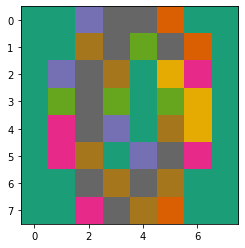

In [21]:
plt.imshow(X_dig[666].reshape(8,8), cmap="Dark2")

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_dig, y_dig, test_size=0.33, random_state=42)

## hyper parameter

In [23]:
best_score = 0.0
best_k = -1
best_weights = None
for weights in ["uniform", "distance"]:
    for k in range(1, 6):
        knn = KNeighborsClassifier(n_neighbors=k, weights=weights)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        if score > best_score:
            best_score, best_k, best_weights = score, k, weights
            
print(best_score, best_k, best_weights)

0.9932659932659933 5 uniform


## GridSerach

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
parameters = [
    {'weights':['uniform'],'n_neighbors':[i for i in range(1, 6)]},
    {'weights':['distance'],'n_neighbors':[i for i in range(1, 6)], 'p':[i for i in range(1,6)]}
             ]

In [26]:
knn = KNeighborsClassifier()

In [27]:
clf = GridSearchCV(knn, parameters)

In [28]:
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5], 'p': [1, 2, 3, 4, 5],
                          'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
knn_gs = clf.best_estimator_

In [30]:
clf.best_score_

0.9866908713692946

In [31]:
knn_gs.score(X_test, y_test)

0.9865319865319865

## normalization

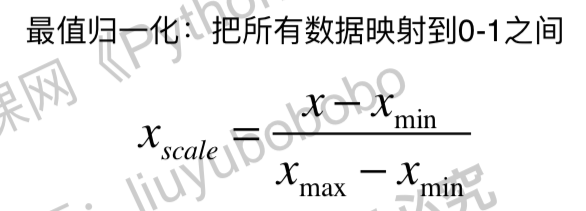

In [32]:
X_normal_min = np.array([np.min(X_dig[:,i]) for i in range(X_dig.shape[1])])
X_normal_max = np.array([np.max(X_dig[:,i]) for i in range(X_dig.shape[1])])

In [33]:
len(X_normal_min),len(X_normal_max)

(64, 64)

In [34]:
X_normal_scale = (X_dig - X_normal_min) / (X_normal_max - X_normal_min)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [35]:
X_normal_scale[1]

array([       nan, 0.        , 0.        , 0.75      , 0.8125    ,
       0.3125    , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.6875    , 1.        , 0.5625    , 0.        ,
       0.        , 0.        , 0.        , 0.1875    , 0.9375    ,
       1.        , 0.375     , 0.        , 0.        , 0.        ,
       0.46666667, 0.9375    , 1.        , 1.        , 0.125     ,
       0.        , 0.        ,        nan, 0.        , 0.0625    ,
       1.        , 1.        , 0.1875    , 0.        ,        nan,
       0.        , 0.        , 0.0625    , 1.        , 1.        ,
       0.375     , 0.        , 0.        , 0.        , 0.        ,
       0.0625    , 1.        , 1.        , 0.375     , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.6875    ,
       1.        , 0.625     , 0.        , 0.        ])

In [36]:
X_normal_data = pd.DataFrame(X_normal_scale)
X_normal_data = X_normal_data.fillna(0)
X_normal_scale_pre = np.array(X_normal_data)

In [37]:
X_normal_scale_pre[1]

array([0.        , 0.        , 0.        , 0.75      , 0.8125    ,
       0.3125    , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.6875    , 1.        , 0.5625    , 0.        ,
       0.        , 0.        , 0.        , 0.1875    , 0.9375    ,
       1.        , 0.375     , 0.        , 0.        , 0.        ,
       0.46666667, 0.9375    , 1.        , 1.        , 0.125     ,
       0.        , 0.        , 0.        , 0.        , 0.0625    ,
       1.        , 1.        , 0.1875    , 0.        , 0.        ,
       0.        , 0.        , 0.0625    , 1.        , 1.        ,
       0.375     , 0.        , 0.        , 0.        , 0.        ,
       0.0625    , 1.        , 1.        , 0.375     , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.6875    ,
       1.        , 0.625     , 0.        , 0.        ])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_normal_scale_pre, y_dig, test_size=0.33, random_state=42)

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
knn.score(X_test, y_test)

0.9932659932659933

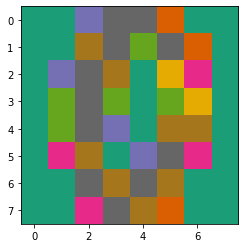

In [42]:
plt.imshow(X_normal_scale_pre[666].reshape(8,8), cmap="Dark2")

## Standardization

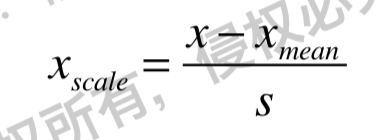

In [43]:
X_stand_mean = np.array([np.mean(X_dig[:,i]) for i in range(X_dig.shape[1])])
X_stand_std = np.array([np.std(X_dig[:,i]) for i in range(X_dig.shape[1])])

In [44]:
X_stand_scale = (X_dig - X_stand_mean) / X_stand_std

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [45]:
X_stand_data = pd.DataFrame(X_stand_scale)
X_stand_data = X_stand_data.fillna(0)
X_stand_scale_pre = np.array(X_stand_data)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_stand_scale_pre, y_dig, test_size=0.33, random_state=42)

In [47]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
knn.score(X_test, y_test)

0.9781144781144782

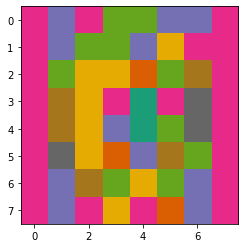

In [50]:
plt.imshow(X_stand_scale_pre[666].reshape(8,8), cmap="Dark2")

## scale in sklearn

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_dig, y_dig, test_size=0.33, random_state=42)

In [52]:
X_train[1]

array([ 0.,  0.,  1., 15., 15.,  2.,  0.,  0.,  0.,  0.,  0., 12., 16.,
        7.,  0.,  0.,  0.,  0.,  0., 14., 16.,  5.,  0.,  0.,  0.,  0.,
        0., 13., 16.,  2.,  0.,  0.,  0.,  0.,  2., 16., 13.,  0.,  0.,
        0.,  0.,  0.,  6., 16., 13.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
       11.,  0.,  0.,  0.,  0.,  0.,  1., 14., 16.,  7.,  0.,  0.])

In [53]:
standScale = StandardScaler()

In [54]:
standScale.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [55]:
standScale.mean_.shape,standScale.scale_.shape

((64,), (64,))

In [56]:
X_train[1]

array([ 0.,  0.,  1., 15., 15.,  2.,  0.,  0.,  0.,  0.,  0., 12., 16.,
        7.,  0.,  0.,  0.,  0.,  0., 14., 16.,  5.,  0.,  0.,  0.,  0.,
        0., 13., 16.,  2.,  0.,  0.,  0.,  0.,  2., 16., 13.,  0.,  0.,
        0.,  0.,  0.,  6., 16., 13.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
       11.,  0.,  0.,  0.,  0.,  0.,  1., 14., 16.,  7.,  0.,  0.])

In [57]:
X_train_transform = standScale.transform(X_train)

In [58]:
X_train_transform[1]

array([ 0.        , -0.35276262, -0.87246598,  0.7376261 ,  0.74029594,
       -0.66675088, -0.39446536, -0.12830245, -0.05478595, -0.62236025,
       -1.85430728, -0.00479036,  1.17486846, -0.19802116, -0.51291751,
       -0.13525536, -0.05456747, -0.71332737, -1.70174156,  1.16724685,
        1.43517592, -0.46689341, -0.55039331, -0.10829185, -0.04080783,
       -0.76518531, -1.42950808,  0.71056432,  1.00102024, -0.93255812,
       -0.61761261, -0.04080783,  0.        , -0.65031291, -0.891156  ,
        1.0881673 ,  0.45413681, -1.4618128 , -0.8037801 ,  0.        ,
       -0.07127841, -0.52169715, -0.14718769,  1.33947525,  0.83524206,
       -1.4365777 , -0.78747008, -0.09664544, -0.04025169, -0.41602807,
       -0.28425094,  1.21809978,  0.27375757, -1.46484496, -0.75916372,
       -0.21870851, -0.02884349, -0.31805598, -0.88330316,  0.44498135,
        0.84655031,  0.03591595, -0.505317  , -0.19535349])

In [59]:
X_test_transform =  standScale.transform(X_test)

In [60]:
knn = KNeighborsClassifier(n_neighbors=5)

In [61]:
knn.fit(X_train_transform, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [62]:
knn.score(X_test_transform, y_test)

0.9764309764309764

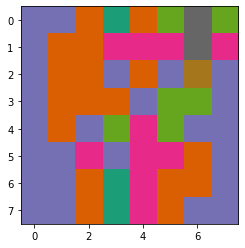

In [63]:
plt.imshow(X_train_transform[666].reshape(8,8), cmap="Dark2")